In [146]:
using CairoMakie
using SpecialFunctions

# This notebook covers the setup of the filament
include("src/parameters.jl")
include("src/filament_state.jl")

Ri_min (generic function with 1 method)

In [292]:
NbN₀(Ri, α, δ) = let a=create_simulation_parameters((; Ro=3, Ri, α, δ); verbose=false)
    (a.Nb, a.N₀)
end

NbN₀ (generic function with 1 method)

In [295]:
#αs = range(0.5, 3, 200)
δs = range(-1, -0.03, 200)
α₀ = 1.8
δ₀ = -0.35
Ri₀ = 0.25
Ri₁ = 0.3
NbN₀s = [NbN₀(Ri₁, α₀, δ) for δ in δs]
Nbs = [a[1] for a in NbN₀s]
N₀s = [a[2] for a in NbN₀s];

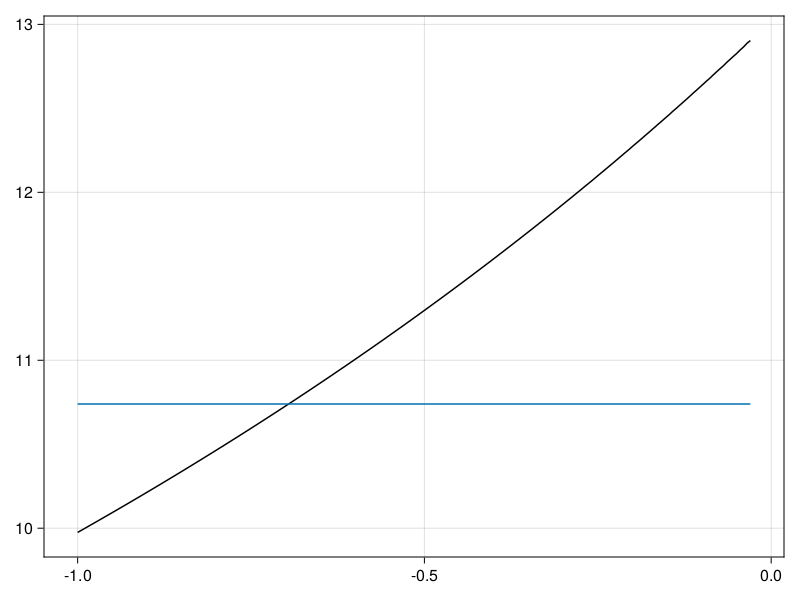

In [299]:
fig = Figure()
ax = Axis(fig[1, 1])

(Nb₀, N₀₀) = NbN₀(Ri₀, α₀, δ₀)
lines!(ax, δs, Nbs, color=:black)
lines!(ax, [δs[1], δs[end]], [Nb₀, Nb₀])
#lines!(ax, δs, N₀s, color=:black)
fig

In [301]:
minindex = argmin((Nbs .- Nb₀).^2)
α₁ = α₀
δ₁ = δs[minindex]
Ri₁ = 1
(α₀, δ₁)

(1.8, -0.6977889447236181)

In [302]:
# So these two
sp1 = create_simulation_parameters((; Ro=3, Ri=Ri₀, α=α₀, δ=δ₀))
sp2 = create_simulation_parameters((; Ro=3, Ri=Ri₁, α=α₁, δ=δ₁))

┌ Info: Created simulation parameters
│ Input:
│  Ro=3
│  Ri=0.25
│  Ek=nothing
│  α=1.8
│  λ=0.05
│  δ=-0.35
│ Output:
│  L=1
│  f=1
│  H=0.1
│  δH=-0.034999999999999996
│  N₀=66.62300634347697
│  Nb=10.739652154779069
│  ℓ=1.8
│  ν=nothing
└  Lz=0.25
┌ Info: Created simulation parameters
│ Input:
│  Ro=3
│  Ri=1
│  Ek=nothing
│  α=1.8
│  λ=0.05
│  δ=-0.6977889447236181
│ Output:
│  L=1
│  f=1
│  H=0.1
│  δH=-0.06977889447236181
│  N₀=48.606716673320136
│  Nb=19.59779107575627
│  ℓ=1.8
│  ν=nothing
└  Lz=0.25


(Ro = 3, Ri = 1, Ek = nothing, α = 1.8, λ = 0.05, δ = -0.6977889447236181, L = 1, f = 1, H = 0.1, δH = -0.06977889447236181, N₀ = 48.606716673320136, Nb = 19.59779107575627, ℓ = 1.8, ν = nothing, Lz = 0.25)

In [290]:
(b1, v1) = get_filament_state(sp1)
(b, v) = get_filament_state(sp2)

[ Info: Filament state created: Ro=3.000095440105776, Ro_min=-0.8100047692312096, Fr₀=0.04503092257108139, Frb=0.2793475428131771, Ri_min=0.28203211665211614
[ Info: Filament state created: Ro=3.000287539925583, Ro_min=1.4092597086234893, Fr₀=0.045329802169875824, Frb=0.28007355727821887, Ri_min=0.9999979388568564


(b = b, v = v)

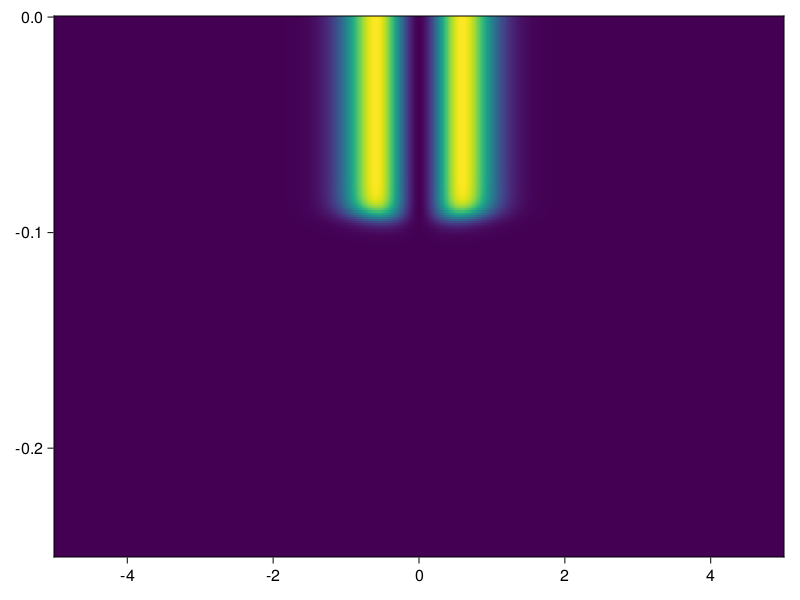

In [291]:
xs = range(-5sp.L, 5sp.L, 1024)
zs = range(-sp.Lz, 0, 256)
@inline ∂v∂z(x, z) =  (v(x, z+5e-4) - v(x, z-5e-4)) / 1e-3
@inline ∂b∂z(x, z) =  (b(x, z+5e-4) - b(x, z-5e-4)) / 1e-3
@inline invRi(x, z) = ∂v∂z(x, z)^2 / abs(∂b∂z(x, z))
heatmap(xs, zs, invRi)

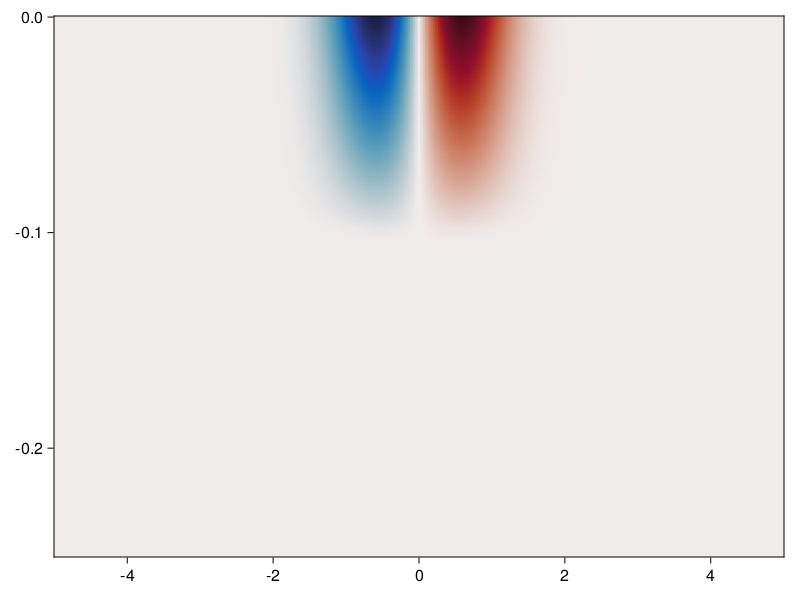

In [287]:
heatmap(xs, zs, v2, colormap=:balance)

search: maximum! maximum MaximumIntensityProjection



```
maximum!(r, A)
```

Compute the maximum value of `A` over the singleton dimensions of `r`, and write results to `r`.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> maximum!([1; 1], A)
2-element Vector{Int64}:
 2
 4

julia> maximum!([1 1], A)
1×2 Matrix{Int64}:
 3  4
```
